<center>
    
## Eye Tracking: Experiment Design and Machine Learning Methods

# Assignment 5
### Feature-based classification methods


*Names:* GAO Fei
<br>
*Matriculation numbers:* `22-736-359`
<br>


**Please upload the exercise as a pre-compiled jupyter notebook to OLAT until May 04, 10.15 a.m.**

**Goal:**<br>
We will try to implement an SVM classifying the gender of a reader based on eye-tracking data. The goal is to just implement something reasonable and working, not to achieve high accuracies. For this task, you will find the data in the folder 'readingMeasures' taken from the Potsdam Textbook Corpus (https://osf.io/dn5hp/files).<br>
You will have to load the data, aggregate the features so that they can be used as input for an SVM, and possibly visualise the results.

### Task 1
Load the data for each participant and each reading.

In [15]:
import os
import pandas as pd
import re

pd.set_option('display.max_columns', None)

In [27]:
readers = {}

for _, _, file_paths in os.walk('./readingMeasures/'):
    for file_path in file_paths:
        match_result = re.match(r"reader(\d+)_(\w+)_rm.txt", str(file_path))
        try:
            reader = str(match_result.group(1))
            subject = str(match_result.group(2))
            df = pd.read_csv('./readingMeasures/' + file_path, sep='\t', na_values=['None'])
        except AttributeError:
            continue
        try:
            readers[reader][subject] = df
        except KeyError:
            readers[reader] = {}
            readers[reader][subject] = df

In [28]:
readers['40']['p4']

,WordIndexSent,SentIndex,FFD,SFD,FD,FPRT,FRT,TFT,RRT,RPD_inc,RPD_exc,RBRT,Fix,FPF,RR,FPReg,TRC_out,TRC_in,LP,SL_in,SL_out,ACC_B_Q1,ACC_B_Q2,ACC_B_Q3,ACC_T_Q1,ACC_T_Q2,ACC_T_Q3,topic,trial,itemid,reader,gender,major,expert_status,age,meanAccBQ,meanAccTQ,group
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,-1,11,p4,40,-1,-1,-1,19,0.0,0.333333,3
1,2,1,245,245,245,245,245,686,441,245,0,245,1,1,1,0,0,1,2,2,1,0.0,0.0,1.0,0.0,0.0,0.0,-1,11,p4,40,-1,-1,-1,19,0.0,0.333333,3
2,3,1,284,284,284,284,284,284,0,284,0,284,1,1,0,0,0,0,3,1,1,0.0,0.0,1.0,0.0,0.0,0.0,-1,11,p4,40,-1,-1,-1,19,0.0,0.333333,3
3,4,1,183,0,183,662,662,816,154,662,0,662,1,1,1,0,1,1,5,1,1,0.0,0.0,1.0,0.0,0.0,0.0,-1,11,p4,40,-1,-1,-1,19,0.0,0.333333,3
4,5,1,375,0,375,1857,1857,1857,0,1857,0,1857,1,1,0,0,0,0,3,1,2,0.0,0.0,1.0,0.0,0.0,0.0,-1,11,p4,40,-1,-1,-1,19,0.0,0.333333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,13,6,278,0,278,463,463,463,0,463,0,463,1,1,0,0,0,0,1,1,2,0.0,0.0,1.0,0.0,0.0,0.0,-1,11,p4,40,-1,-1,-1,19,0.0,0.333333,3
137,14,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,-1,11,p4,40,-1,-1,-1,19,0.0,0.333333,3
138,15,6,302,0,302,451,451,451,0,451,0,451,1,1,0,0,0,0,3,2,1,0.0,0.0,1.0,0.0,0.0,0.0,-1,11,p4,40,-1,-1,-1,19,0.0,0.333333,3
139,16,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0.0,0.0,1.0,0.0,0.0,0.0,-1,11,p4,40,-1,-1,-1,19,0.0,0.333333,3


### Task 2
Do some basic data exploration. 

In [29]:
readers['0']['b0'].describe(include='all')

,WordIndexSent,SentIndex,FFD,SFD,FD,FPRT,FRT,TFT,RRT,RPD_inc,RPD_exc,RBRT,Fix,FPF,RR,FPReg,TRC_out,TRC_in,LP,SL_in,SL_out,ACC_B_Q1,ACC_B_Q2,ACC_B_Q3,ACC_T_Q1,ACC_T_Q2,ACC_T_Q3,topic,trial,itemid,reader,gender,major,expert_status,age,meanAccBQ,meanAccTQ,group
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149.0,149,149.0,149.0,149.0,149.0,149.0,1.490000e+02,1.490000e+02,149.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.590604,5.812081,204.838926,147.395973,238.731544,334.281879,372.624161,692.456376,358.174497,692.456376,338.181208,354.275168,0.838926,0.711409,0.677852,0.120805,0.302013,0.302013,3.053691,1.496644,-0.174497,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,NaN,0.0,1.0,-1.0,1.0,26.0,6.666667e-01,3.333333e-01,4.0
std,5.392705,3.087396,166.817430,166.231921,158.911102,490.718435,482.763238,884.317598,466.110904,2839.178380,2751.519426,494.415214,0.368839,0.454635,0.468875,0.327000,0.589373,0.589373,2.300955,6.083456,8.627996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.002571e-15,5.012854e-16,0.0
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,-97.000000,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,NaN,0.0,1.0,-1.0,1.0,26.0,6.666667e-01,3.333333e-01,4.0
25%,4.000000,3.000000,0.000000,0.000000,156.000000,0.000000,166.000000,214.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,NaN,0.0,1.0,-1.0,1.0,26.0,6.666667e-01,3.333333e-01,4.0
50%,8.000000,6.000000,219.000000,123.000000,234.000000,243.000000,260.000000,480.000000,239.000000,279.000000,0.000000,263.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,NaN,0.0,1.0,-1.0,1.0,26.0,6.666667e-01,3.333333e-01,4.0
75%,12.000000,9.000000,297.000000,273.000000,314.000000,401.000000,433.000000,808.000000,455.000000,504.000000,0.000000,433.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,2.000000,2.000000,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,NaN,0.0,1.0,-1.0,1.0,26.0,6.666667e-01,3.333333e-01,4.0


**Task 2.1** <br>
Print all columns.

In [43]:
column_names = readers['0']['b0'].columns
print(*list(column_names), sep=', ')

WordIndexSent, SentIndex, FFD, SFD, FD, FPRT, FRT, TFT, RRT, RPD_inc, RPD_exc, RBRT, Fix, FPF, RR, FPReg, TRC_out, TRC_in, LP, SL_in, SL_out, ACC_B_Q1, ACC_B_Q2, ACC_B_Q3, ACC_T_Q1, ACC_T_Q2, ACC_T_Q3, topic, trial, itemid, reader, gender, major, expert_status, age, meanAccBQ, meanAccTQ, group


**Task 2.2** <br>
Read the documentation 'eye_tracking_measures.pdf' to get to know the available features/labels.

**Task 2.3** <br>
Check for missing values. (Beware that there are missing values, e.g. `age` for reader 1 and text b5. Figure out how to detect them.)

In [35]:
print('reader', 'text', 'columns with missing values', sep='\t')
for p in sorted(list(readers.keys()), key=int):
    for t in sorted(list(readers[p].keys())):
        df = readers[p][t]
        columns_with_missing_values = [c for c in df.columns if df[c].isnull().any()]
        if len(columns_with_missing_values) >= 1:
            print(p, t, *columns_with_missing_values, sep='\t')
        

reader	text	columns with missing values
1	b0	age
1	b1	age
1	b2	age
1	b3	age
1	b4	age
1	b5	age
1	p0	age
1	p1	age
1	p2	age
1	p3	age
1	p4	age
1	p5	age
104	b0	age
104	b1	age
104	b2	age
104	b3	age
104	b4	age
104	b5	age
104	p0	age
104	p1	age
104	p2	age
104	p3	age
104	p4	age
104	p5	age


### Task 3
Choose the features you will use as input for your SVM (do not yet split them off the dataset). Explain why you chose these features.

**Explanation:** We plan to drop: `age`, `WordIndexSent`, `SentIndex`, `trial`, `reader`, `group`; they are not relevant to the study.


### Task 4

Before being able to use your data as input for your SVM, aggregate the features for each text. 

<br>

*Some information on data aggregation:* Time aggregation is the aggregation of data points for a single resource over a specified period. The result of the aggregation is one data point that reflects a statistical view of the collected and aggregated data points. There are, for instance, **average, minimum, maximum, sum,** or **count** aggregation.
<br>

Use the **average** for your aggregation.

You will probably first need to split off the features you chose from the data set, as well as `gender`, `itemid` and `reader` (because `gender` is your dependent variable, your label; and `itemid` and `reader` are needed to delimit your aggregation).<br>
For every text for every reader, you will get one data point out of the aggregation.

In [60]:
df_readers = pd.DataFrame(columns=column_names)

for p in sorted(list(readers.keys()), key=int):
    for t in sorted(list(readers[p].keys())):
        df = readers[p][t].describe(include='all').loc[['mean']].copy()
        df_readers = df_readers.append(df, ignore_index=True)

In [61]:
df_readers

,WordIndexSent,SentIndex,FFD,SFD,FD,FPRT,FRT,TFT,RRT,RPD_inc,RPD_exc,RBRT,Fix,FPF,RR,FPReg,TRC_out,TRC_in,LP,SL_in,SL_out,ACC_B_Q1,ACC_B_Q2,ACC_B_Q3,ACC_T_Q1,ACC_T_Q2,ACC_T_Q3,topic,trial,itemid,reader,gender,major,expert_status,age,meanAccBQ,meanAccTQ,group
0,8.590604,5.812081,204.838926,147.395973,238.731544,334.281879,372.624161,692.456376,358.174497,692.456376,338.181208,354.275168,0.838926,0.711409,0.677852,0.120805,0.302013,0.302013,3.053691,1.496644,-0.174497,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,NaN,0.0,1.0,-1.0,1.0,26.0,0.666667,0.333333,4.0
1,9.395062,5.203704,194.123457,135.123457,226.092593,291.061728,324.333333,848.666667,557.604938,848.666667,486.858025,361.808642,0.845679,0.722222,0.765432,0.148148,0.364198,0.364198,2.962963,1.129630,-0.364198,0.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,NaN,0.0,1.0,-1.0,1.0,26.0,1.000000,0.666667,4.0
2,9.460000,5.826667,204.173333,148.453333,246.726667,269.840000,312.393333,677.593333,407.753333,677.593333,365.540000,312.053333,0.913333,0.740000,0.800000,0.146667,0.313333,0.313333,3.666667,1.133333,0.633333,0.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,NaN,0.0,1.0,-1.0,1.0,26.0,1.000000,0.333333,4.0
3,8.716667,7.050000,188.555556,136.433333,234.555556,286.361111,334.311111,831.461111,545.100000,831.461111,489.133333,342.327778,0.850000,0.672222,0.783333,0.144444,0.455556,0.455556,2.788889,0.872222,0.627778,0.0,1.0,1.0,1.0,0.0,1.0,1.0,8.0,NaN,0.0,1.0,-1.0,1.0,26.0,0.666667,0.666667,4.0
4,9.924051,5.664557,200.094937,140.493671,238.493671,342.746835,381.886076,821.917722,479.170886,821.917722,432.221519,389.696203,0.816456,0.670886,0.683544,0.158228,0.386076,0.386076,2.955696,1.284810,-0.088608,0.0,0.0,1.0,0.0,0.0,1.0,1.0,7.0,NaN,0.0,1.0,-1.0,1.0,26.0,0.333333,0.333333,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,10.664474,4.532895,133.460526,86.217105,220.125000,214.328947,322.552632,1049.585526,835.256579,1049.585526,807.763158,241.822368,0.960526,0.585526,0.921053,0.105263,0.585526,0.585526,2.631579,0.085526,0.210526,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,8.0,NaN,105.0,1.0,1.0,-1.0,19.0,0.666667,0.000000,1.0
896,11.150794,4.047619,179.547619,122.134921,238.753968,263.523810,339.539683,1148.920635,885.396825,1148.920635,848.460317,300.460317,0.960317,0.722222,0.904762,0.126984,0.666667,0.666667,2.952381,0.920635,0.317460,0.0,1.0,0.0,0.0,1.0,1.0,-1.0,12.0,NaN,105.0,1.0,1.0,-1.0,19.0,0.666667,0.333333,1.0
897,17.715909,3.000000,139.153409,101.380682,218.721591,194.034091,298.806818,671.272727,477.238636,671.272727,446.579545,224.693182,0.931818,0.596591,0.835227,0.119318,0.352273,0.352273,3.125000,1.113636,0.215909,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,1.0,NaN,105.0,1.0,1.0,-1.0,19.0,0.333333,0.333333,1.0
898,13.319149,3.659574,176.588652,127.177305,229.758865,272.397163,340.283688,817.056738,544.659574,817.056738,514.588652,302.468085,0.950355,0.723404,0.886525,0.120567,0.475177,0.475177,2.815603,1.035461,0.120567,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,7.0,NaN,105.0,1.0,1.0,-1.0,19.0,0.333333,0.333333,1.0


### Task 5

Make sure that you have now a **training matrix X** that contains only your feature columns, and a **label vector y** that only contains the true labels (gender).<br>
Then split your data into training and test set. Use between 10-20% of the subjects for testing.

In [76]:
X = df_readers.copy().drop(['gender', 'WordIndexSent', 'SentIndex', 'trial', 'reader', 'group', 'age', 'itemid'], axis=1)
y = df_readers['gender'].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
X_train

,FFD,SFD,FD,FPRT,FRT,TFT,RRT,RPD_inc,RPD_exc,RBRT,Fix,FPF,RR,FPReg,TRC_out,TRC_in,LP,SL_in,SL_out,ACC_B_Q1,ACC_B_Q2,ACC_B_Q3,ACC_T_Q1,ACC_T_Q2,ACC_T_Q3,topic,major,expert_status,meanAccBQ,meanAccTQ
577,165.567901,129.030864,195.537037,231.950617,264.487654,551.327160,319.376543,551.327160,273.962963,277.364198,0.839506,0.697531,0.586420,0.191358,0.401235,0.401235,2.512346,1.024691,-0.203704,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,0.666667
179,91.070588,65.311765,161.152941,114.870588,201.376471,511.158824,396.288235,511.158824,375.029412,136.129412,0.823529,0.435294,0.752941,0.129412,0.511765,0.511765,3.070588,1.623529,-0.194118,0.0,0.0,1.0,1.0,0.0,1.0,-1.0,-1.0,1.0,0.666667,0.333333
661,197.648148,114.253086,223.024691,346.376543,383.012346,438.543210,92.166667,438.543210,73.135802,365.407407,0.839506,0.740741,0.209877,0.074074,0.098765,0.098765,2.320988,1.000000,0.697531,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.666667,0.000000
600,120.590604,103.637584,149.382550,143.174497,176.704698,222.664430,79.489933,222.664430,61.946309,160.718121,0.771812,0.617450,0.288591,0.174497,0.221477,0.221477,3.046980,0.979866,0.724832,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.666667,1.000000
0,204.838926,147.395973,238.731544,334.281879,372.624161,692.456376,358.174497,692.456376,338.181208,354.275168,0.838926,0.711409,0.677852,0.120805,0.302013,0.302013,3.053691,1.496644,-0.174497,0.0,0.0,1.0,1.0,1.0,0.0,1.0,-1.0,1.0,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,178.079545,138.971591,204.159091,249.431818,275.511364,642.965909,393.534091,642.965909,376.107955,266.857955,0.909091,0.784091,0.732955,0.107955,0.329545,0.329545,2.607955,0.232955,-0.801136,1.0,0.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.000000,0.666667
523,103.105263,77.723684,159.230263,131.000000,186.657895,409.875000,278.875000,409.875000,240.921053,168.953947,0.848684,0.552632,0.592105,0.250000,0.638158,0.638158,2.782895,1.072368,0.368421,0.0,0.0,1.0,1.0,0.0,1.0,-1.0,1.0,1.0,0.666667,0.333333
15,114.116667,78.722222,191.966667,189.411111,284.394444,641.883333,452.472222,641.883333,374.516667,267.366667,0.950000,0.566667,0.816667,0.305556,0.733333,0.733333,2.827778,0.938889,-0.922222,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,1.0,0.333333,1.000000
85,185.858025,133.290123,221.191358,265.913580,301.246914,874.154321,608.240741,874.154321,523.271605,350.882716,0.888889,0.728395,0.827160,0.240741,0.543210,0.543210,2.611111,1.129630,-0.765432,0.0,0.0,1.0,0.0,1.0,1.0,1.0,-1.0,1.0,0.666667,0.333333


In [78]:
y_train

577    1.0
179    1.0
661    1.0
600   -1.0
0      1.0
      ... 
198   -1.0
523   -1.0
15    -1.0
85    -1.0
458    1.0
Name: gender, Length: 720, dtype: float64

### Task 6


**Task 6.1** <br>
Define and train your SVM.

In [86]:
from sklearn.svm import SVC

clf = SVC(probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

**Task 6.2** <br>
Test your SVM on the test set and calculate the accuracy and the ROC curve.

In [92]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print('accuracy score =', accuracy_score(y_test, y_pred))

accuracy score = 0.5944444444444444


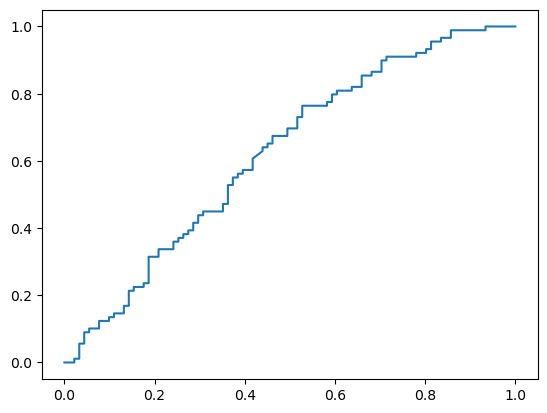

AUC = 0.6222990492653414


In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

plt.plot(fpr, tpr)
plt.show()

auc_score = auc(fpr, tpr)
print('AUC =', auc_score)

### Bonus Tasks

**Bonus Task 1**
<br>
Visualise your test data in 2D or 3D.

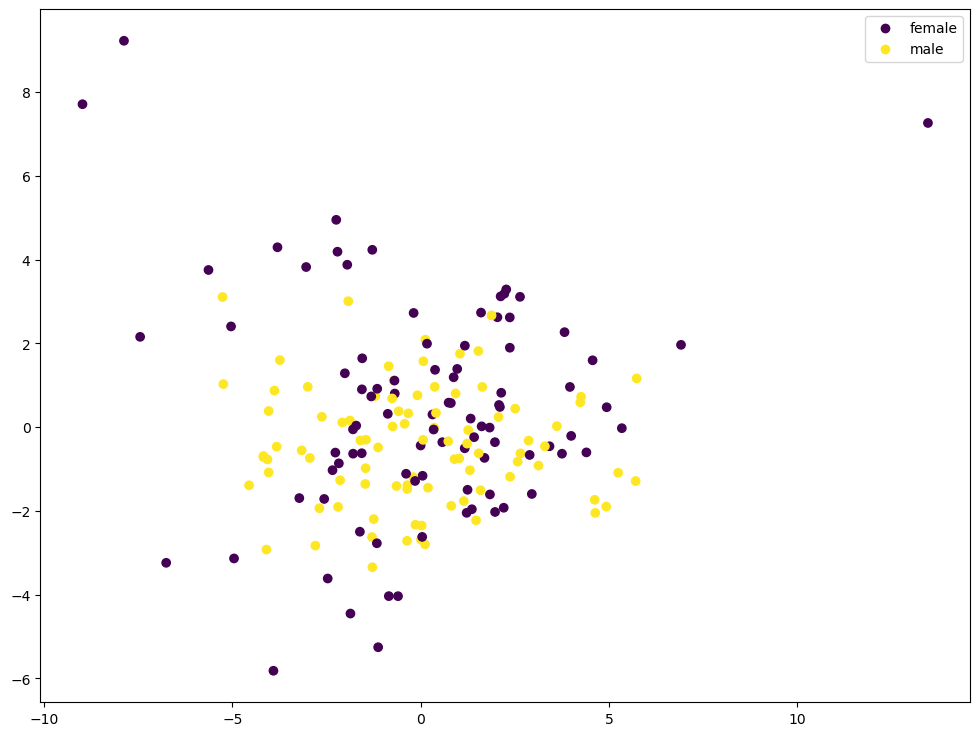

In [111]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(StandardScaler(), PCA())
X_test_transformed = pipe.fit_transform(X_test)

fig, ax = plt.subplots(figsize=(12,9))
ax.scatter(X_test_transformed[:,0], X_test_transformed[:,1], c=y_test)
plt.legend(handles=plot.legend_elements()[0], labels=['female', 'male'])
plt.show()

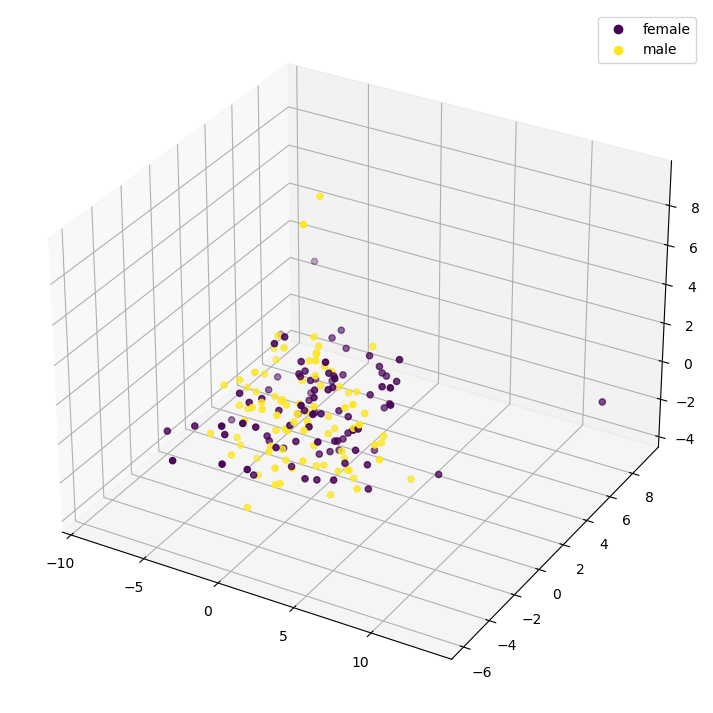

In [109]:
fig, ax = plt.subplots(figsize=(12,9), subplot_kw={"projection": "3d"})
ax.scatter(X_test_transformed[:,0], X_test_transformed[:,1], X_test_transformed[:,2], c=y_test)
plt.legend(handles=plot.legend_elements()[0], labels=['female', 'male'])
plt.show()

**Bonus Task 2**<br>
Try to improve your results from the SVM above by fine-tuning your SVM, preprocessing your data, using a random forest, etc.

accuracy score = 0.7333333333333333


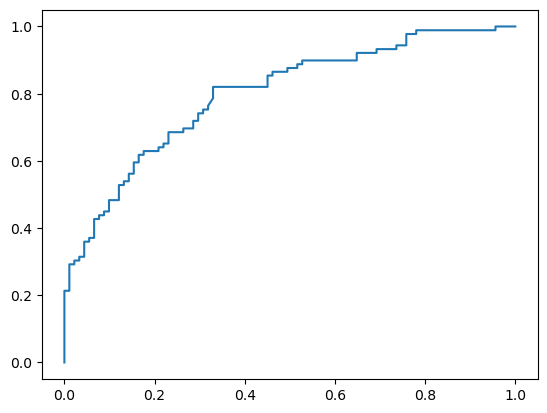

AUC = 0.7986171132238548


In [94]:


clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy score =', accuracy_score(y_test, y_pred))

y_prob = clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

plt.plot(fpr, tpr)
plt.show()

auc_score = auc(fpr, tpr)
print('AUC =', auc_score)
